In [1]:
from csv import reader
import numpy as np
from unidecode import unidecode
import pandas as pd
import statsmodels.api as sm
import scipy as ss
from sklearn import preprocessing

In [2]:
from limpeza import main as limpa
from cria_legislatura import main as legislatura
from build import main as build # rede 1 - Direcionada, ligação votos de Dep em Dep
#from build_gml import main as build # rede 2 - Não direcionada, ligação correlação entre todos os votos de dois Deps
from gml_para_rede import main as rede
from conta_frentes import main as frentes
from request_data import main as requests

# roda só uma vez
requests()
limpa()
legislatura()

# roda se mudar o tipo de rede
build()
rede()
frentes()

Baixando arquivos
Requests finalizadas
---------------------
limpa_deputados
limpa_todas_votacoes
limpa_todas_votacoesVotos
limpa_todas_proposicoesAutores
limpa_frentes
Limpeza completa
---------------------
Legislatura
---------------------
Build finalizado
---------------------
Reciprocity 2003-2006: 0.0687593423019432
Reciprocity 2007-2010: 0.1300106309799262
Reciprocity 2011-2014: 0.0928473672837283
Reciprocity 2015-2018: 0.08808553971486761
Gml para rede
---------------------
Frentes
---------------------


In [3]:
qtd_leg = 4
arquivos = {
    'deputados': [
        'deputados-2003-2006.csv',
        'deputados-2007-2010.csv',
        'deputados-2011-2014.csv',
        'deputados-2015-2018.csv'
    ]
}

path = 'ArquivosLimpos/'

In [4]:
for e in range(qtd_leg):
    deputados = pd.read_csv(path + arquivos['deputados'][e]).dropna()
    H = deputados.query('siglaSexo == "M"')['eigenvecto_centrality']
    M = deputados.query('siglaSexo == "F"')['eigenvecto_centrality']
    res = ss.stats.ttest_ind(M,H, equal_var=True)
    print(res)

Ttest_indResult(statistic=-1.707352726164056, pvalue=0.08826957150422649)
Ttest_indResult(statistic=0.1035076852377368, pvalue=0.9175945223520245)
Ttest_indResult(statistic=-0.7644015445153696, pvalue=0.4449092854910959)
Ttest_indResult(statistic=0.7644941603797848, pvalue=0.44487039484630153)


## 2003 - 2006

#### Carrega o Database

In [49]:
deputados = pd.read_csv(path + arquivos['deputados'][0]).dropna()

#### Histograma - Valores de Eigenvector centrality (Homens)

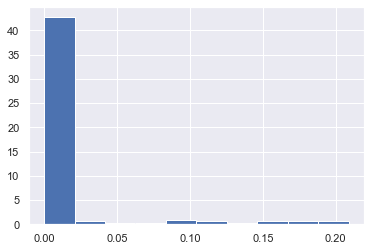

In [50]:
graf_M = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'M'].hist(density=1)

#### Histograma - Valores de Eigenvector centrality (Mulheres)

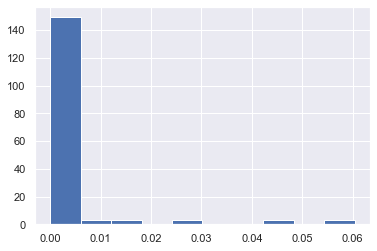

In [51]:
graf_F = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'F'].hist(density=1)

#### P-value

In [52]:
H = deputados.query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados.query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=-1.707352726164056, pvalue=0.08826957150422649)

#### Histograma - Valores de Eigenvector centrality > 0.01 (Homens)

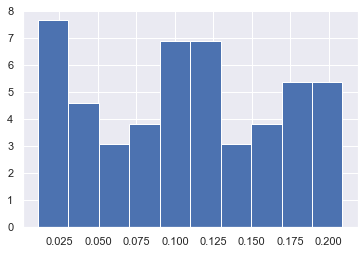

In [53]:
graf_M = deputados['eigenvecto_centrality'][(deputados['siglaSexo'] == 'M') & (deputados['eigenvecto_centrality'] > 0.01)].hist(density=1)

#### Histograma - Valores de Eigenvector centrality > 0.01 (Mulheres)

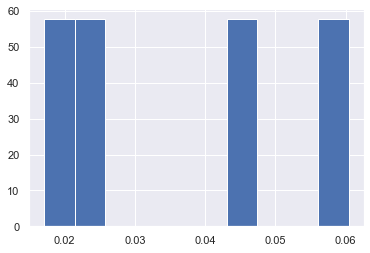

In [54]:
graf_M = deputados['eigenvecto_centrality'][(deputados['siglaSexo'] == 'F') & (deputados['eigenvecto_centrality'] > 0.01)].hist(density=1)

#### P-value 

In [55]:
H = deputados[deputados['eigenvecto_centrality'] > 0.01].query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados[deputados['eigenvecto_centrality'] > 0.01].query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=-2.295773321710483, pvalue=0.024777937342265844)

## 2007 - 2010

#### Carrega o Database

In [56]:
deputados = pd.read_csv(path + arquivos['deputados'][1]).dropna()

#### Histograma - Valores de Eigenvector centrality (Homens)

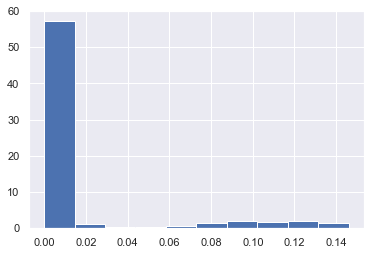

In [57]:
graf_M = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'M'].hist(density=1)

#### Histograma - Valores de Eigenvector centrality (Mulheres)

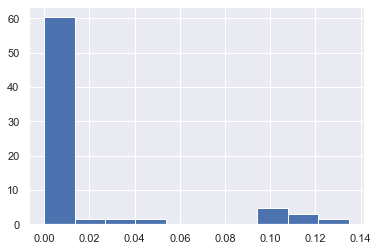

In [58]:
graf_F = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'F'].hist(density=1)

#### P-value

In [59]:
H = deputados.query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados.query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=0.1035076852377368, pvalue=0.9175945223520245)

#### Histograma - Valores de Eigenvector centrality > 0.01 (Homens)

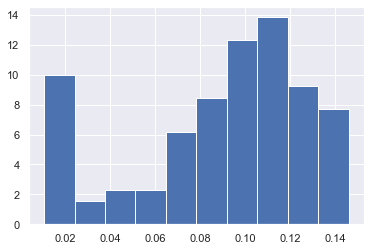

In [60]:
graf_M = deputados['eigenvecto_centrality'][(deputados['siglaSexo'] == 'M') & (deputados['eigenvecto_centrality'] > 0.01)].hist(density=1)

#### Histograma - Valores de Eigenvector centrality > 0.01 (Mulheres)

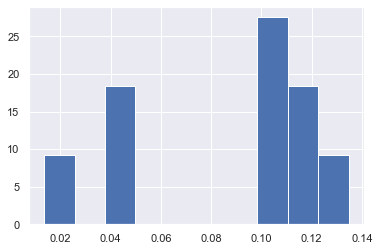

In [61]:
graf_M = deputados['eigenvecto_centrality'][(deputados['siglaSexo'] == 'F') & (deputados['eigenvecto_centrality'] > 0.01)].hist(density=1)

#### P-value 

In [62]:
H = deputados[deputados['eigenvecto_centrality'] > 0.01].query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados[deputados['eigenvecto_centrality'] > 0.01].query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=-0.34163270302688037, pvalue=0.7333233333134384)

## 2011 - 2014

#### Carrega o Database

In [63]:
deputados = pd.read_csv(path + arquivos['deputados'][2]).dropna()

#### Histograma - Valores de Eigenvector centrality (Homens)

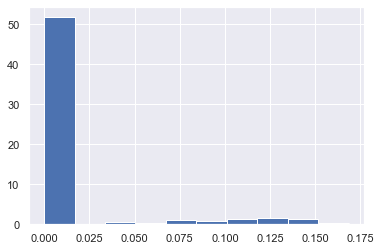

In [64]:
graf_M = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'M'].hist(density=1)

#### Histograma - Valores de Eigenvector centrality (Mulheres)

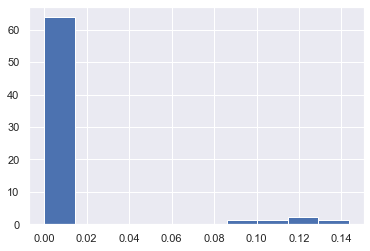

In [65]:
graf_F = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'F'].hist(density=1)

#### P-value

In [66]:
H = deputados.query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados.query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=-0.7644015445153696, pvalue=0.4449092854910959)

#### Histograma - Valores de Eigenvector centrality > 0.01 (Homens)

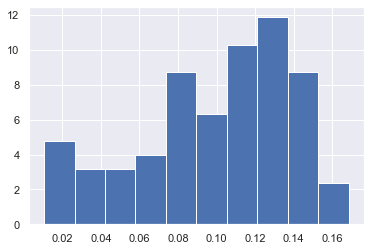

In [67]:
graf_M = deputados['eigenvecto_centrality'][(deputados['siglaSexo'] == 'M') & (deputados['eigenvecto_centrality'] > 0.01)].hist(density=1)

#### Histograma - Valores de Eigenvector centrality > 0.01 (Mulheres)

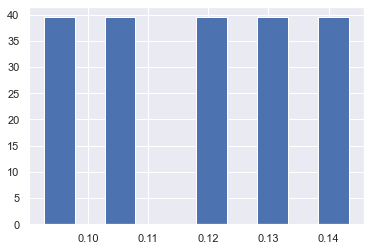

In [68]:
graf_M = deputados['eigenvecto_centrality'][(deputados['siglaSexo'] == 'F') & (deputados['eigenvecto_centrality'] > 0.01)].hist(density=1)

#### P-value 

In [69]:
H = deputados[deputados['eigenvecto_centrality'] > 0.01].query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados[deputados['eigenvecto_centrality'] > 0.01].query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=0.9947769778791515, pvalue=0.32273606712554537)

## 2015 - 2018

#### Carrega o Database

In [70]:
deputados = pd.read_csv(path + arquivos['deputados'][3]).dropna()

#### Histograma - Valores de Eigenvector centrality (Homens)

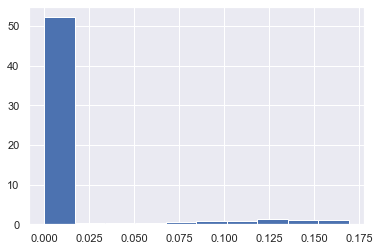

In [71]:
graf_M = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'M'].hist(density=1)

#### Histograma - Valores de Eigenvector centrality (Mulheres)

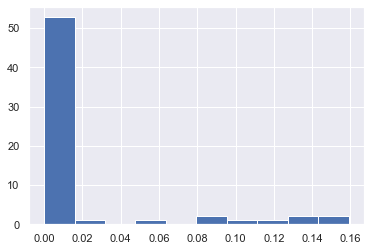

In [72]:
graf_F = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'F'].hist(density=1)

#### P-value

In [73]:
H = deputados.query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados.query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=0.7644941603797848, pvalue=0.44487039484630153)

#### Histograma - Valores de Eigenvector centrality > 0.01 (Homens)

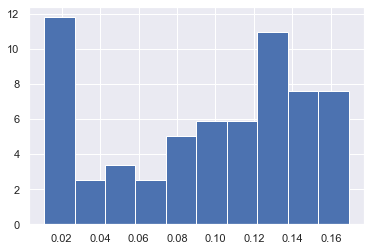

In [74]:
graf_M = deputados['eigenvecto_centrality'][(deputados['siglaSexo'] == 'M') & (deputados['eigenvecto_centrality'] > 0.01)].hist(density=1)

#### Histograma - Valores de Eigenvector centrality > 0.01 (Mulheres)

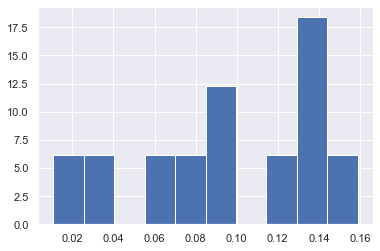

In [75]:
graf_M = deputados['eigenvecto_centrality'][(deputados['siglaSexo'] == 'F') & (deputados['eigenvecto_centrality'] > 0.01)].hist(density=1)

#### P-value 

In [76]:
H = deputados[deputados['eigenvecto_centrality'] > 0.01].query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados[deputados['eigenvecto_centrality'] > 0.01].query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=0.11780173870907915, pvalue=0.9065059820921764)